# Results

In [2]:
import json
import os
results_path = os.path.join('..','data')
results_folders = []

for root, dirs, files in os.walk(results_path):
    if root == results_path:
        results_folders = dirs
        break

data = {}
for folder in results_folders:
    data[folder] = {}
    for root, dirs, files in os.walk(os.path.join(results_path,folder)):
        for file in files:
            if file == 'final_report.json':
                with open(os.path.join(root,file)) as f:
                    data[folder][os.path.basename(root)] = json.load(f)
                    


models = [ results['model'] for report, questions in data.items() for question, results in questions.items() ]
models = list(set(models))
questions = [ question for report, questions in data.items() for question, results in questions.items() ]
questions = sorted(list(set(questions)), key=lambda x: x.lower())




##  Overview
### Did the solution pass the tests?

<BarContainer object of 2 artists>

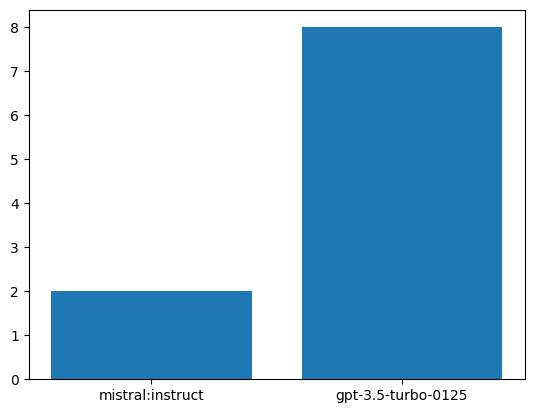

In [3]:
from matplotlib import pyplot as plt

tests_passed_x = models
tests_passed_y = []

for model in models:
    passed = 0
    for report, questions in data.items():
        for question, results in questions.items():
            if results['model'] == model:
                passed += results['passed']
    tests_passed_y.append(passed)

plt.bar(tests_passed_x, tests_passed_y)


### How many retries were there?

10
10


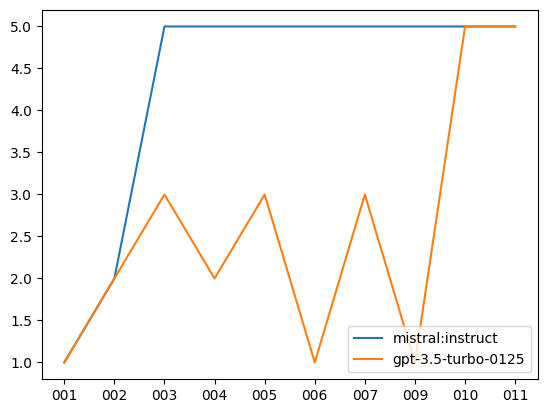

In [14]:
import matplotlib.pyplot as plt

for model in models:
    total_retries_x = [question_name.split('_')[1] for question_name in questions.keys()]
    total_retries_y = []

    for question in questions:
        for report, questions_reported in data.items():
            if question in questions_reported:
                results = questions_reported[question]
                if results['model'] == model:
                    total_retries_y.append(results['total_retries'])
                    break
  
    total_retries_x, total_retries_y = zip(*sorted(zip(total_retries_x, total_retries_y)))
    plt.plot(total_retries_x, total_retries_y, label=model)
    plt.legend()




## Response




### Was is extracted correctly?


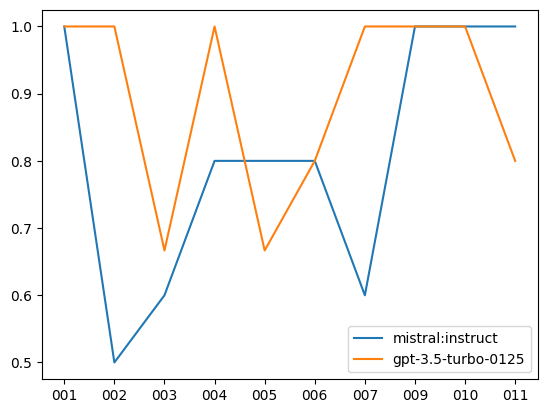

In [26]:

total_extracted_x = [question_name.split('_')[1] for question_name in questions.keys()]
total_extracted_y = []

for question in questions:
  for model, questions_reported in data.items():
    if question in questions_reported:  
      extracted_success_rate = 0
      for retry in questions_reported[question]['tries']:
        if questions_reported[question]['tries'][retry]['is_extracted']:
          extracted_success_rate += 1
      total_extracted_y = list(total_extracted_y)  # Convert tuple to list
      total_extracted_y.append(extracted_success_rate/len(questions_reported[question]['tries']))
      
total_extracted_x, total_extracted_y = zip(*sorted(zip(total_extracted_x, total_extracted_y)))

         
# same but per model

total_extracted_x = [question_name.split('_')[1] for question_name in questions.keys()]
total_extracted_y = []

for model in models:
    total_extracted_y = []
    for question in questions:
        for report, questions_reported in data.items():
            if question in questions_reported:
                results = questions_reported[question]
                if results['model'] == model:
                    extracted_success_rate = 0
                    for retry in results['tries']:
                        if results['tries'][retry]['is_extracted']:
                            extracted_success_rate += 1
                    total_extracted_y.append(extracted_success_rate/len(results['tries']))
                    break

    total_extracted_x, total_extracted_y = zip(*sorted(zip(total_extracted_x, total_extracted_y)))
    plt.plot(total_extracted_x, total_extracted_y, label=model)
    plt.legend()




### How many blocks of code were there?


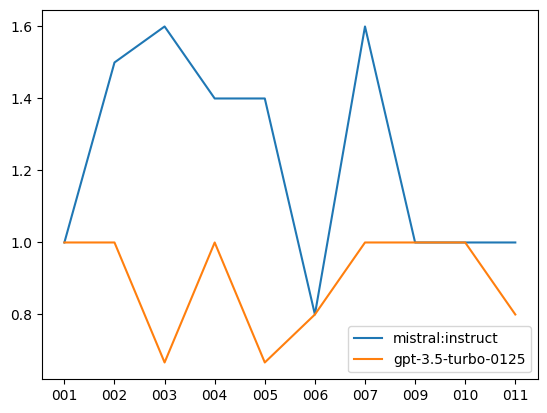

In [29]:

total_code_blocks_x = [question_name.split('_')[1] for question_name in questions.keys()]
total_code_blocks_y = []


total_code_blocks_x = [question_name.split('_')[1] for question_name in questions.keys()]
total_code_blocks_y = []

for model in models:
    total_code_blocks_y = []
    for question in questions:
        for report, questions_reported in data.items():
            if question in questions_reported:
                results = questions_reported[question]
                if results['model'] == model:
                    total_code_blocks = 0
                    for retry in results['tries']:
                        if results['tries'][retry]['number_of_code_blocks']:
                            total_code_blocks += results['tries'][retry]['number_of_code_blocks']
                            
                    total_code_blocks_y.append(total_code_blocks/len(results['tries']))
                    
                    break
                  
    total_code_blocks_x, total_code_blocks_y = zip(*sorted(zip(total_code_blocks_x, total_code_blocks_y)))
    plt.plot(total_code_blocks_x, total_code_blocks_y, label=model)
    plt.legend()






### Was there additional information?


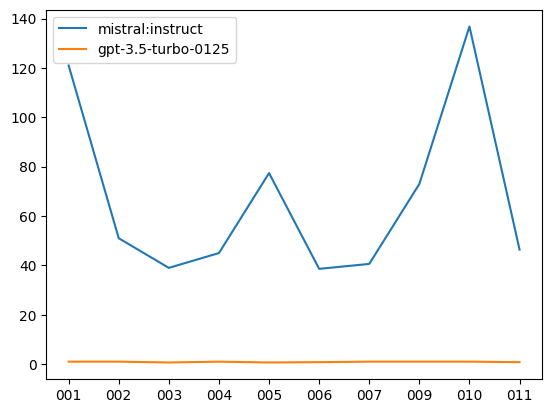

In [33]:
# "extra_information_num_words"

extra_information_num_words_x = [question_name.split('_')[1] for question_name in questions.keys()]
extra_information_num_words_y = []

for model in models:
    extra_information_num_words_y = []
    for question in questions:
        for report, questions_reported in data.items():
            if question in questions_reported:
                results = questions_reported[question]
                if results['model'] == model:
                    extra_information_num_words = 0
                    for retry in results['tries']:
                        if results['tries'][retry]['extra_information_num_words']:
                            extra_information_num_words += results['tries'][retry]['extra_information_num_words']
                            
                    extra_information_num_words_y.append(extra_information_num_words/len(results['tries']))
                    
                    break
                  
    extra_information_num_words_x, extra_information_num_words_y = zip(*sorted(zip(extra_information_num_words_x, extra_information_num_words_y)))
    plt.plot(extra_information_num_words_x, extra_information_num_words_y, label=model)
    plt.legend()

## Infer



### How many issues were there?




### What were the issues?





## Tests




### How many tests were there?




### How many tests passed?




### How many tests failed?




### How many tests had errors?
